# Lab 1 - Analysis

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib nbagg

import h5py
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append('/Users/kalie/courses/ne204/lab/ne204_lab1')
from tools import find_activity, fit_waveform

sys.path.append('/Users/kalie/courses/ne204/lab/lab_partners/ne204lib')
from spectrumtools.spectrum import Spectrum
from spectrumtools.generate_trapezoid_filter import generate_trapezoid_filter
from spectrumtools.analyze_waveform import plot_pulses, fit_tau, shape_waveform

## Calibration source information
Using test 2 config settings
Date of data collection: 9/23/22
* Cs-137
    - 10 minutes (600 seconds)
    - 10.2 $\mu$Ci, 377.4 kBq, 1-Jun-13
    - SID ?
    - half life: 30.1671(13) y
    - source strengh on measurement day: 8.24 $\mu$Ci
    - 662 keV
* Co-60
    - 10 minutes (600 seconds)
    - 9.947 $\mu$Ci, 368.0 kBq, 15-Mar-12
    - SID ?
    - half life: 5.2713(8) y
    - source strengh on measurement day: 2.49 $\mu$Ci
    - 1173 keV, 99.85%, 1332.492 keV 99.9826%
* Co-57
    - 10 minutes (600 seconds)
    - 10.8 $\mu$Ci, 399.6 kBq, 1-Mar-15
    - SID 37668
    - half life: 271.74(6) d
    - source strengh on measurement day: 8.895 nCi
    - 122 keV 85.6%, 136.47 keV 10.68%, 6 keV 32.9%
    
Date of data collection: 10/07/22
* Measurement time: 15 minutes?
* Cs-137
    - 10.2 $\mu$Ci, 377.4 kBq, 1-Jun-13
    - SID ?
    - half life: 30.1671(13) y
    - source strengh on measurement day: 8.23 $\mu$Ci
    - 662 keV
* Co-60 (source 1)
    - 9.947 $\mu$Ci, 368.0 kBq, 15-Mar-12
    - SID ?
    - half life: 5.2713(8) y
    - source strengh on measurement day: 2.48 $\mu$Ci
    - 1173 keV, 99.85%, 1332.492 keV 99.9826%
* Co-60 (source 2)
    - 10.52 $\mu$Ci, 389.2 kBq, 1-Jun-13
    - SID ?
    - half life: 5.2713(8) y
    - source strengh on measurement day: 2.91 $\mu$Ci
    - 1173 keV, 99.85%, 1332.492 keV 99.9826%
* Co-57
    - 10.8 $\mu$Ci, 399.6 kBq, 1-Mar-15
    - SID 37668
    - half life: 271.74(6) d
    - source strengh on measurement day: 8.572 nCi
    - 122 keV 85.6%, 136.47 keV 10.68%, 6 keV 32.9%

In [2]:
# 9/23 measurement
# Cs
print('Cs-137')
t12_days = 30.1671*365.25 # days
years_passed = 9
months_passed = 3
days_passed = 22
time_passed_days = years_passed*365.25 + months_passed * 30.5 + days_passed
print(find_activity(t12_days,10.2,time_passed_days),'uCi')

# Co-60
print('Co-60')
t12_days = 5.2713*365.25 # days
years_passed = 10
months_passed = 6
days_passed = 8
time_passed_days = years_passed*365.25 + months_passed * 30.5 + days_passed
print(find_activity(t12_days,9.947,time_passed_days),'uCi')

# Co-57
print('Co-57')
t12_days = 271.74 # days
years_passed = 7
months_passed = 6
days_passed = 22
time_passed_days = years_passed*365.25 + months_passed * 30.5 + days_passed
print(find_activity(t12_days,10.2,time_passed_days),'uCi')
(print('10/07'))
# 10/07 measurement
# 1-jun-13
print('Cs-137')
t12_days = 30.1671*365.25 # days
years_passed = 9
months_passed = 4
days_passed = 6
time_passed_days = years_passed*365.25 + months_passed * 30.5 + days_passed
print(find_activity(t12_days,10.2,time_passed_days),'uCi')

# Co-60 source 2
# 15-mar-12
print('Co-60')
t12_days = 5.2713*365.25 # days
years_passed = 10
months_passed = 6
days_passed = 22
time_passed_days = years_passed*365.25 + months_passed * 30.5 + days_passed
print(find_activity(t12_days,9.947,time_passed_days),'uCi')

# Co-60 source 2
# 1-jun-13
print('Co-60 source 2')
t12_days = 5.2713*365.25 # days
years_passed = 9
months_passed = 4
days_passed = 6
time_passed_days = years_passed*365.25 + months_passed * 30.5 + days_passed
print(find_activity(t12_days,9.947,time_passed_days),'uCi')

# Co-57
# 1-Mar-15
print('Co-57')
t12_days = 271.74 # days
years_passed = 7
months_passed = 7
days_passed = 6
time_passed_days = years_passed*365.25 + months_passed * 30.5 + days_passed
print(find_activity(t12_days,10.2,time_passed_days),'uCi')

Cs-137
8.23551097162932 uCi
Co-60
2.493190462147374 uCi
Co-57
0.008895489856833258 uCi
10/07
Cs-137
8.228002316314079 uCi
Co-60
2.480655962708259 uCi
Co-60 source 2
2.9087938947705987 uCi
Co-57
0.00857248945651834 uCi


## Import data

In [3]:
# f_name = 'data/cs137.h5'
# f_data = h5py.File(f_name,'r')
# cs137 = f_data['raw_data'][()]
# print(cs137.shape)
# # invert pulses false, 500 trigger delay, 120 trigger threshold
# f_name = 'data/co60.h5'
# f_data = h5py.File(f_name,'r')
# co60 = f_data['raw_data'][()]
# print(co60.shape)

# f_name = 'data/co57.h5'
# f_data = h5py.File(f_name,'r')
# co57 = f_data['raw_data'][()]
# print(co57.shape)
print('Calibration data')
f_name = 'data/22_10_07/calibrate.h5'
f_data = h5py.File(f_name,'r')
calibration = f_data['raw_data'][()]
calibration_events = f_data['event_data'][()]
print(str(calibration.shape[0])+' events')

Calibration data
78775 events


# Clean data
The event data timestamps show that there are periods of time where the detector is not collecting data. They also show that the last several waveforms are repeated. To analyze the data, these repeated events must first be removed.

<IPython.core.display.Javascript object>


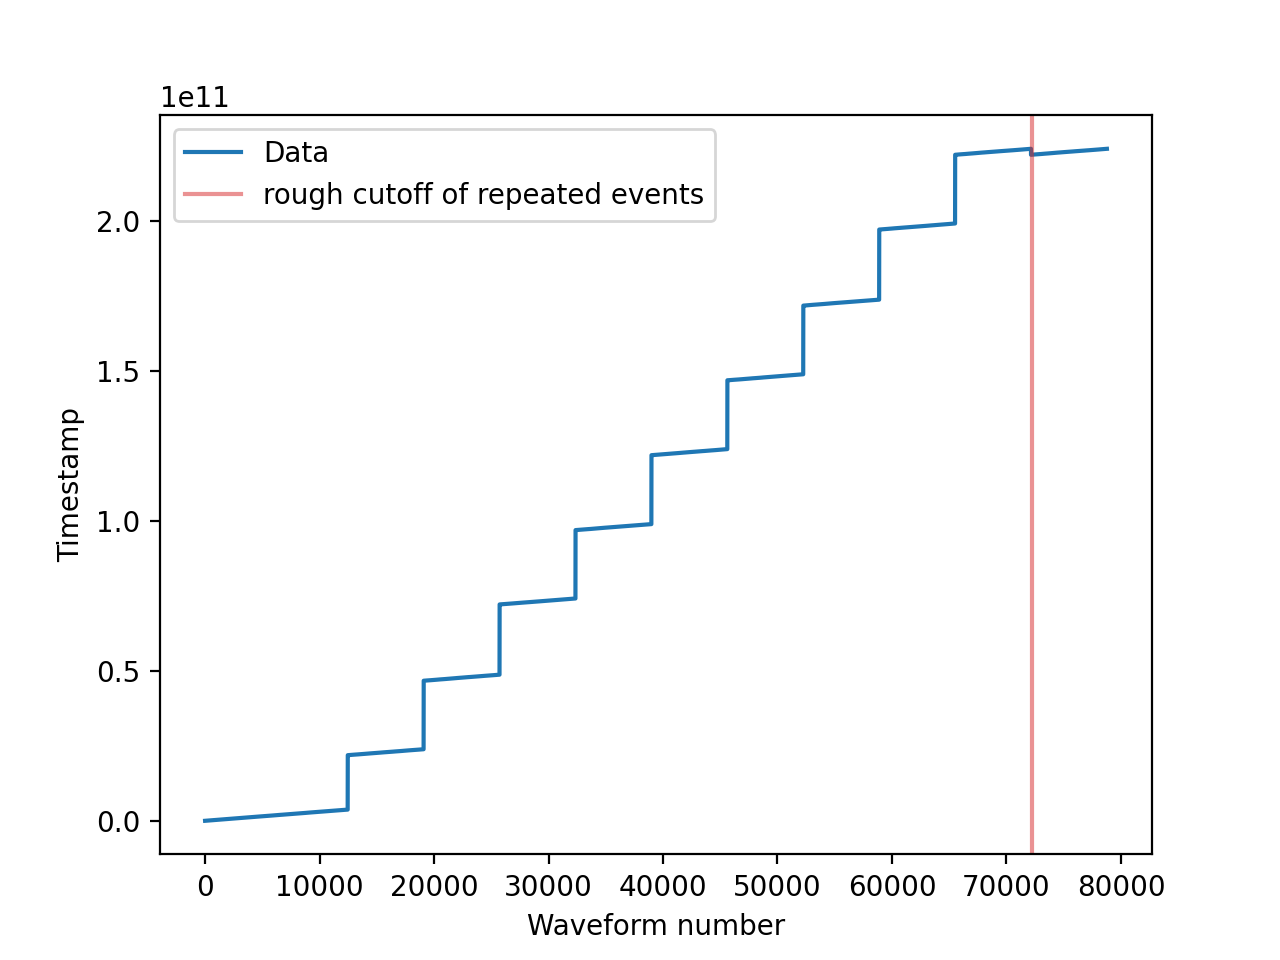

In [4]:
plt.figure()
plt.plot(calibration_events['timestamp'],label='Data')
# plt.axvline(12500,c='tab:orange',alpha=.5,label='dead detector (rough approx.)')
# plt.axvline(19100,c='tab:orange',alpha=.5)
# plt.axvline(25600,c='tab:orange',alpha=.5)
# plt.axvline(32500,c='tab:orange',alpha=.5)
# plt.axvline(38900,c='tab:orange',alpha=.5)
# plt.axvline(45500,c='tab:orange',alpha=.5)
# plt.axvline(52500,c='tab:orange',alpha=.5)
# plt.axvline(58900,c='tab:orange',alpha=.5)
# plt.axvline(65500,c='tab:orange',alpha=.5)
plt.axvline(72250,c='tab:red',alpha=.5,label='rough cutoff of repeated events')

plt.legend()
plt.xlabel('Waveform number')
plt.ylabel('Timestamp')
plt.show()

In [5]:
# find unique waveforms
unique_waves, index, counts = np.unique(calibration_events['timestamp'],return_index=True,return_counts=True)
calibration_events_cleaned = calibration_events[index]
calibration_cleaned = calibration[index]

In [6]:
repeated_indices = index[counts == 2]
unique_repeated_events = calibration_events[repeated_indices]
print('total events repeated',len(unique_repeated_events))
repeated_events = calibration_events[np.isin(calibration_events['timestamp'],unique_repeated_events['timestamp'])]
repeated_data = calibration[np.isin(calibration_events['timestamp'],unique_repeated_events['timestamp'])]
print('total events repeated',len(repeated_events))

total events repeated 6632
total events repeated 13264


In [7]:
# does this match up
6632*2

13264

In [8]:
# split data in half - first occurence and second occurance
pulses1 = repeated_data[:6632] 
pulses2 = repeated_data[-6632:] 

<IPython.core.display.Javascript object>


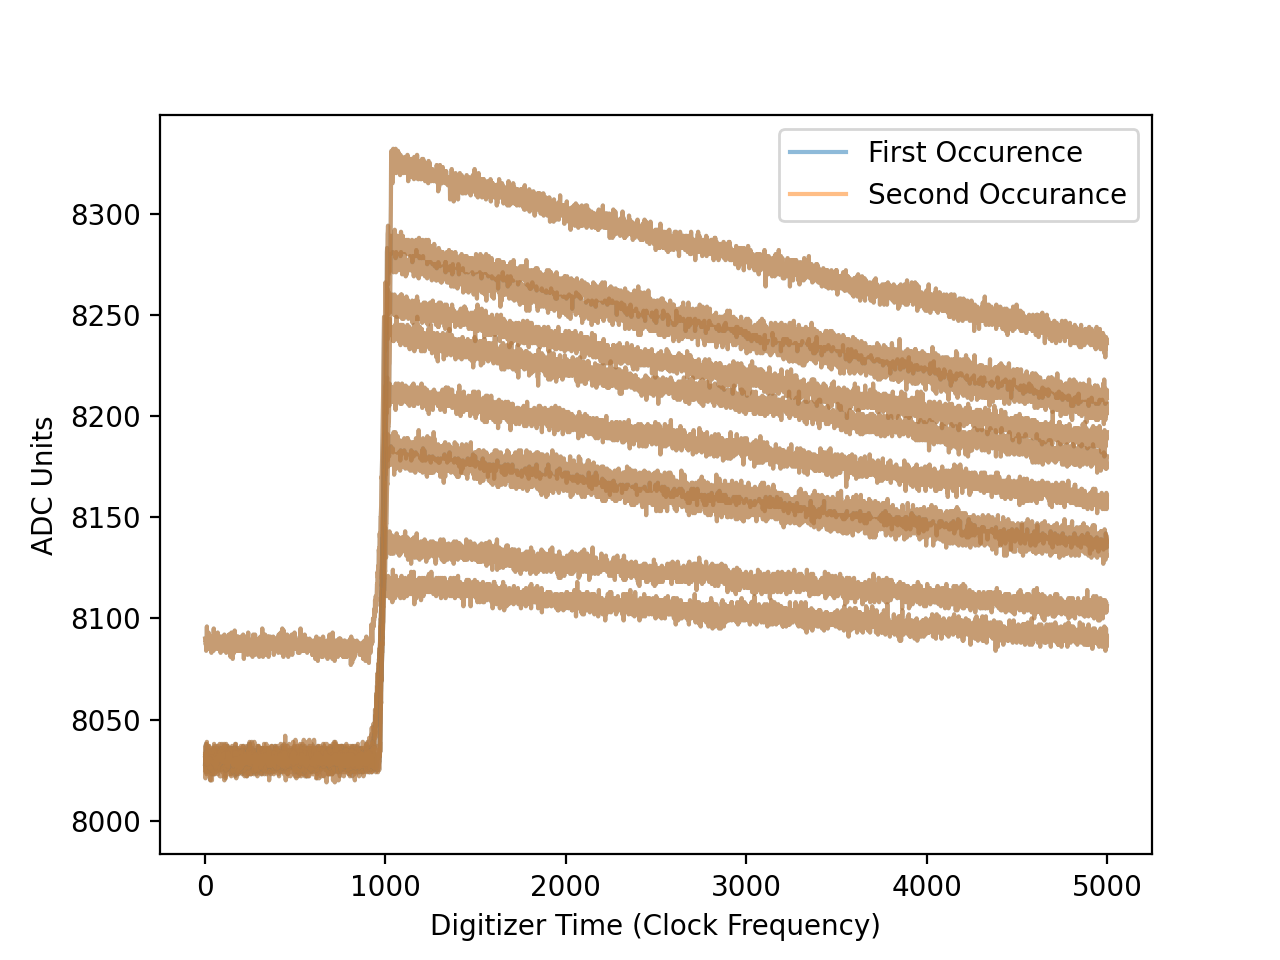

In [9]:
plt.figure()
plt.plot(0,8000,c='tab:blue',label='First Occurence',alpha=0.5)
plt.plot(0,8000,c='tab:orange',label='Second Occurance',alpha=0.5)
for i in range(10):
    n = int(np.random.rand()*len(pulses1))
    plt.plot(pulses1[n],c='tab:blue',alpha=0.5)
    plt.plot(pulses2[n],c='tab:orange',alpha=0.5)
plt.legend()
plt.xlabel('Digitizer Time (Clock Frequency)')
plt.ylabel('ADC Units')
plt.show()
plt.savefig('figs/repeated_pulses_waveforms.png')

<IPython.core.display.Javascript object>


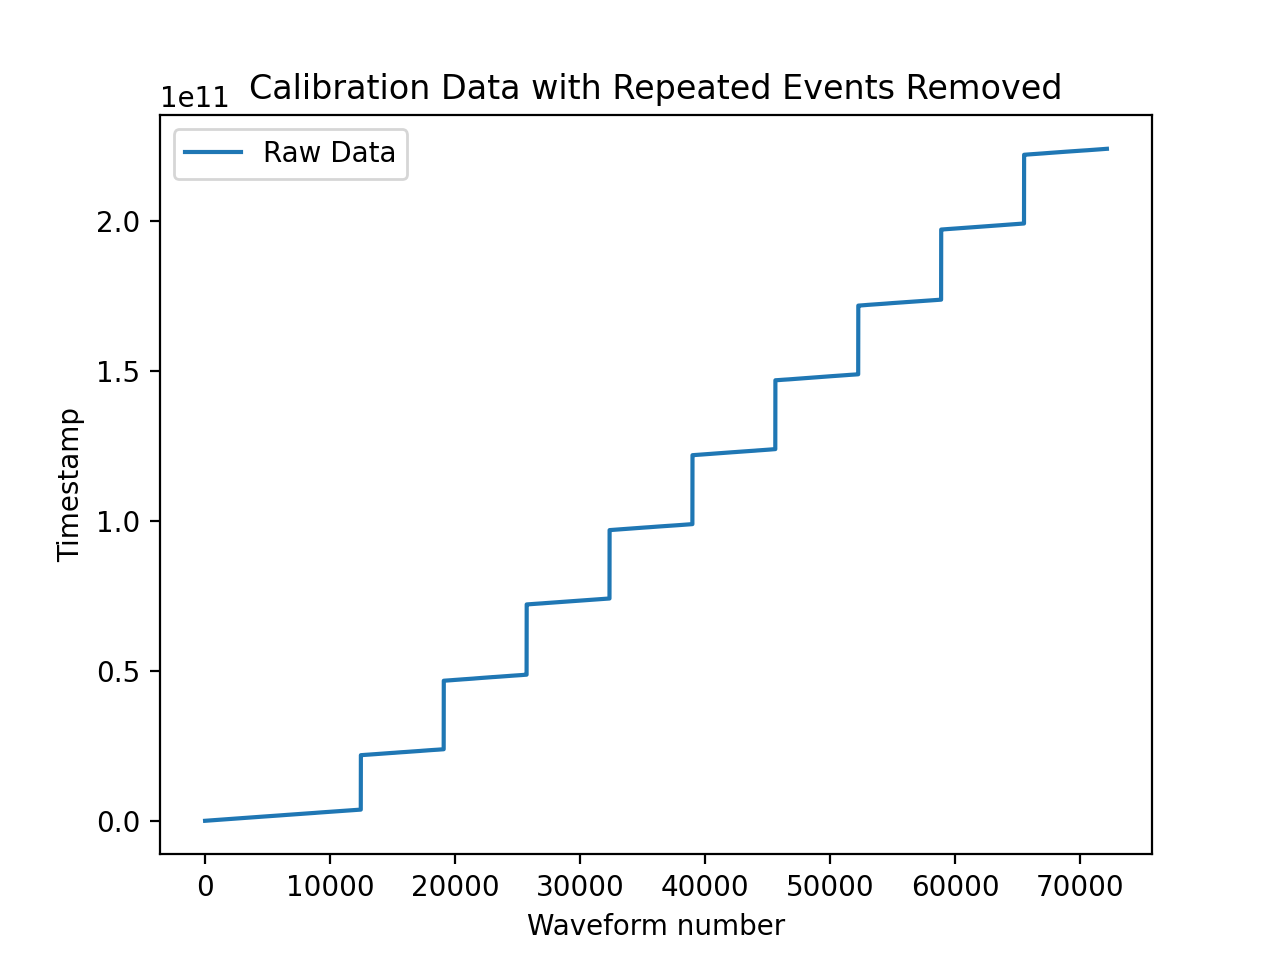

In [10]:
plt.figure()
plt.plot(calibration_events_cleaned['timestamp'],label='Raw Data')
plt.legend()
plt.xlabel('Waveform number')
plt.ylabel('Timestamp')
plt.title('Calibration Data with Repeated Events Removed')
plt.show()

In [11]:
diffs = np.diff(calibration_events['timestamp'])
lower_bound = np.where(diffs > 10e7)[0]
upper_bound = lower_bound + 1
inflections = calibration_events['timestamp'][np.sort(np.append(lower_bound,upper_bound))]

<IPython.core.display.Javascript object>


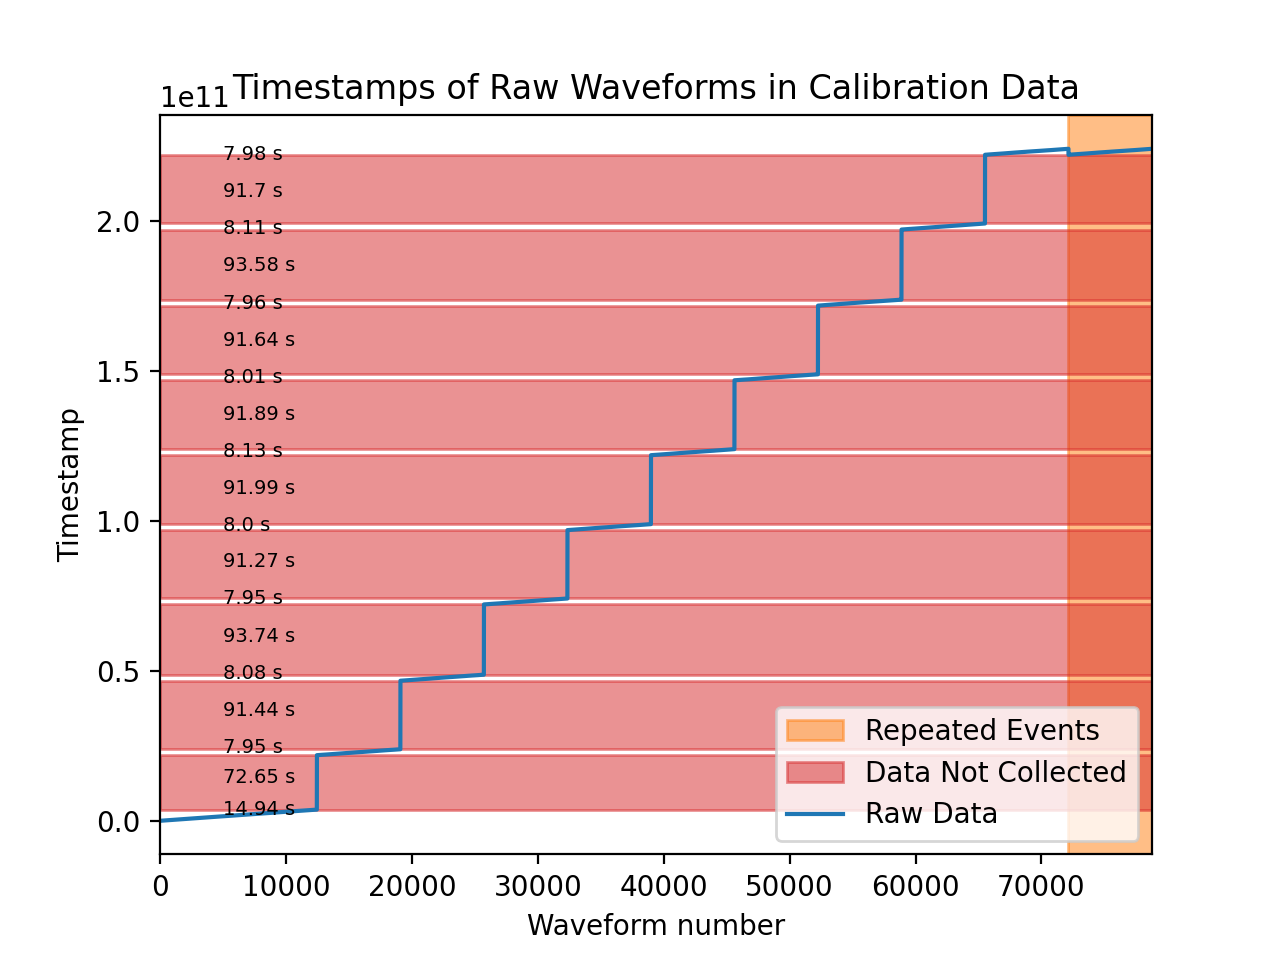

In [12]:
plt.figure()


#plt.plot(calibration_events_cleaned['timestamp'],c='tab:green',label='Cleaned Data',alpha=0.2)

plt.xlim(0,len(calibration_events))
plt.axvspan(len(calibration_events_cleaned),len(calibration_events),color='tab:orange',alpha=0.5,label='Repeated Events')
plt.axhspan(calibration_events['timestamp'][lower_bound[0]],
                calibration_events['timestamp'][upper_bound[0]],
                color='tab:red', alpha=0.5, label='Data Not Collected')
for i in range(1,len(upper_bound)-1):
    plt.axhspan(calibration_events['timestamp'][lower_bound[i]],
                calibration_events['timestamp'][upper_bound[i]],
                color='tab:red',
                alpha=0.5)
# plt.axhspan(3.8e9,2.2e10,color='tab:red',alpha=0.5,label='Data Not Recorded')
# plt.axhspan(2.4e10,4.7e10,color='tab:red',alpha=0.5)
plt.plot(calibration_events['timestamp'],label='Raw Data')
plt.text(5000,(inflections[0]+calibration_events['timestamp'][0])/2.025,str(round((inflections[0]-calibration_events['timestamp'][0])/(250*10**6),2))+' s',fontsize=7)
for i in range(len(inflections)-2):
    plt.text(5000,(inflections[i]+inflections[i+1])/2.025,str(round(np.diff(inflections)[i]/(250*10**6),2))+' s',fontsize=7)
plt.legend(loc='lower right')
plt.xlabel('Waveform number')
plt.ylabel('Timestamp')
plt.title('Timestamps of Raw Waveforms in Calibration Data')
plt.savefig('figs/repated_timestamps.png')
plt.show()

In [14]:
off_times = np.diff(inflections)[::2]/(250*10**6)
off_times = off_times[:9]

In [15]:
on_times = np.diff(inflections)[1::2]/(250*10**6)

In [16]:
off_times.sum()/60

13.498547014200001

In [17]:
(on_times.sum()+(inflections[0]-calibration_events['timestamp'][0])/(250*10**6) )/60

1.4520897395333334

In [18]:
1.4520897395333334+13.498547014200001

14.950636753733335

<IPython.core.display.Javascript object>


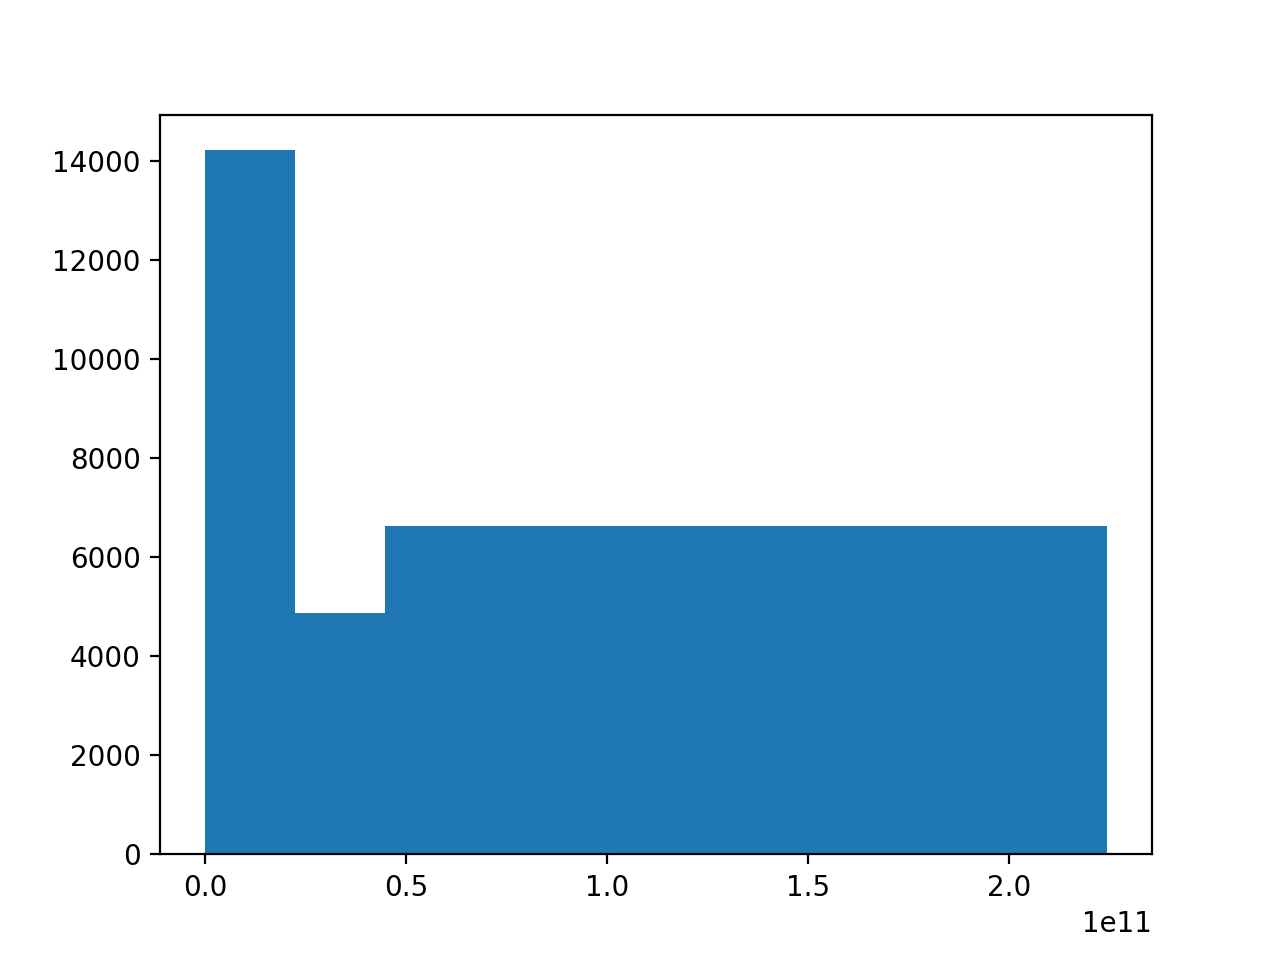

In [75]:
plt.figure()
plt.hist(calibration_events_cleaned['timestamp'],bins=10)
plt.show()

# inspect raw waveforms

<IPython.core.display.Javascript object>


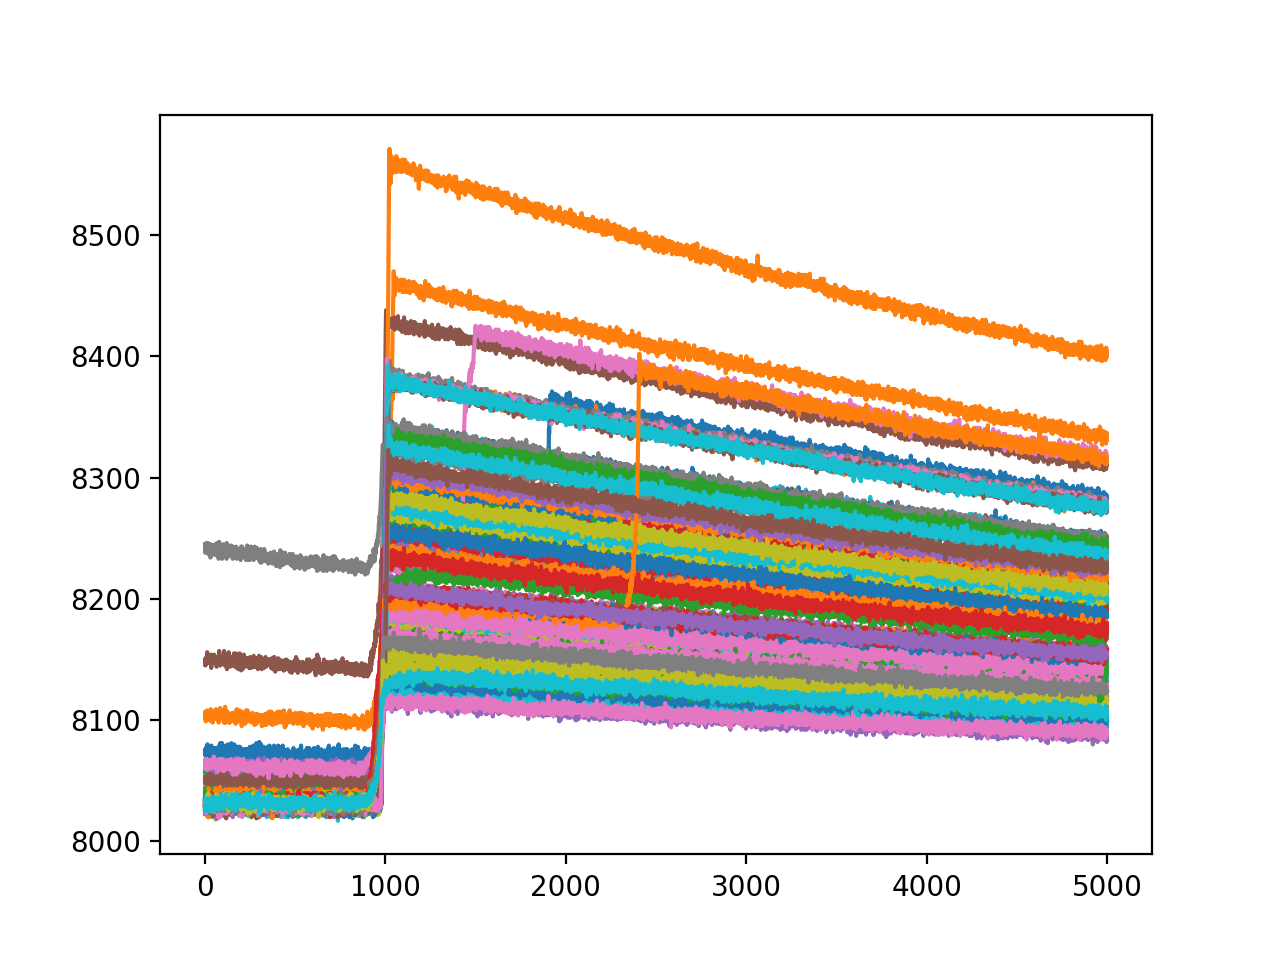

In [15]:
# plot random pulses
# number of random pulses
number_of_pulses = 100
plt.figure()
for i in range(number_of_pulses):
    n = int(np.random.rand()*len(calibration_cleaned))
    plt.plot(calibration_cleaned[n])
#plt.xlim(920,1150)
plt.show()

# Filter pulses

Fitted Decay Constant Tau: 10562.055196175608


/Users/kalie/courses/ne204/lab/lab_partners/ne204lib/spectrumtools/analyze_waveform.py:37: RuntimeWarning: overflow encountered in ushort_scalars
  a_0 = (waveform[0] - waveform[-1])


<IPython.core.display.Javascript object>


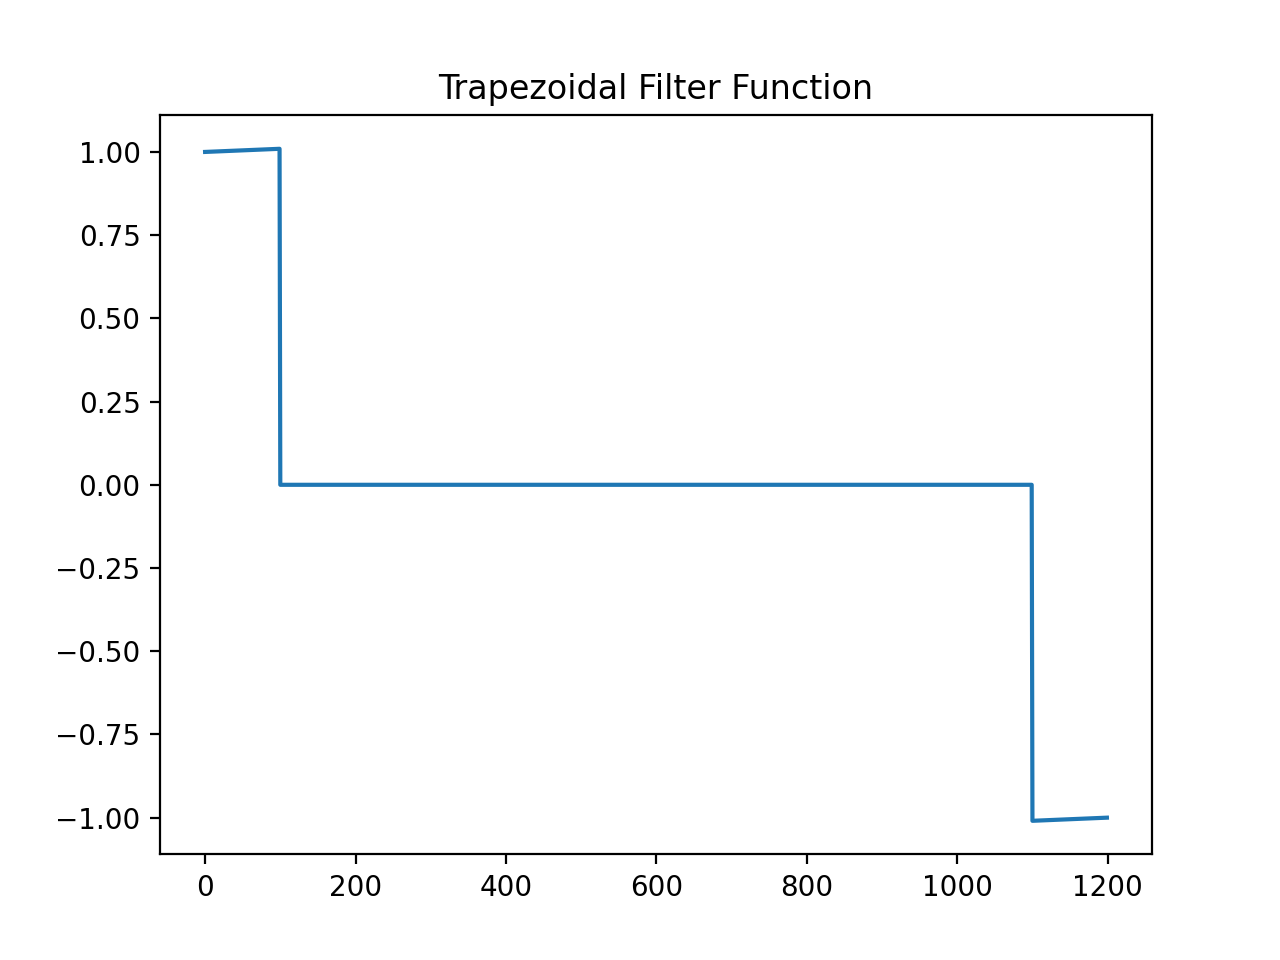

In [20]:
tau = fit_tau(calibration_cleaned[0])
print("Fitted Decay Constant Tau: {0}".format(tau))
k = 100
l = 1000
pre_trigger_delay = 1000


trap_filter = generate_trapezoid_filter(tau, k, l)
plt.figure()
plt.plot(trap_filter)
plt.title("Trapezoidal Filter Function")
plt.show()

<IPython.core.display.Javascript object>


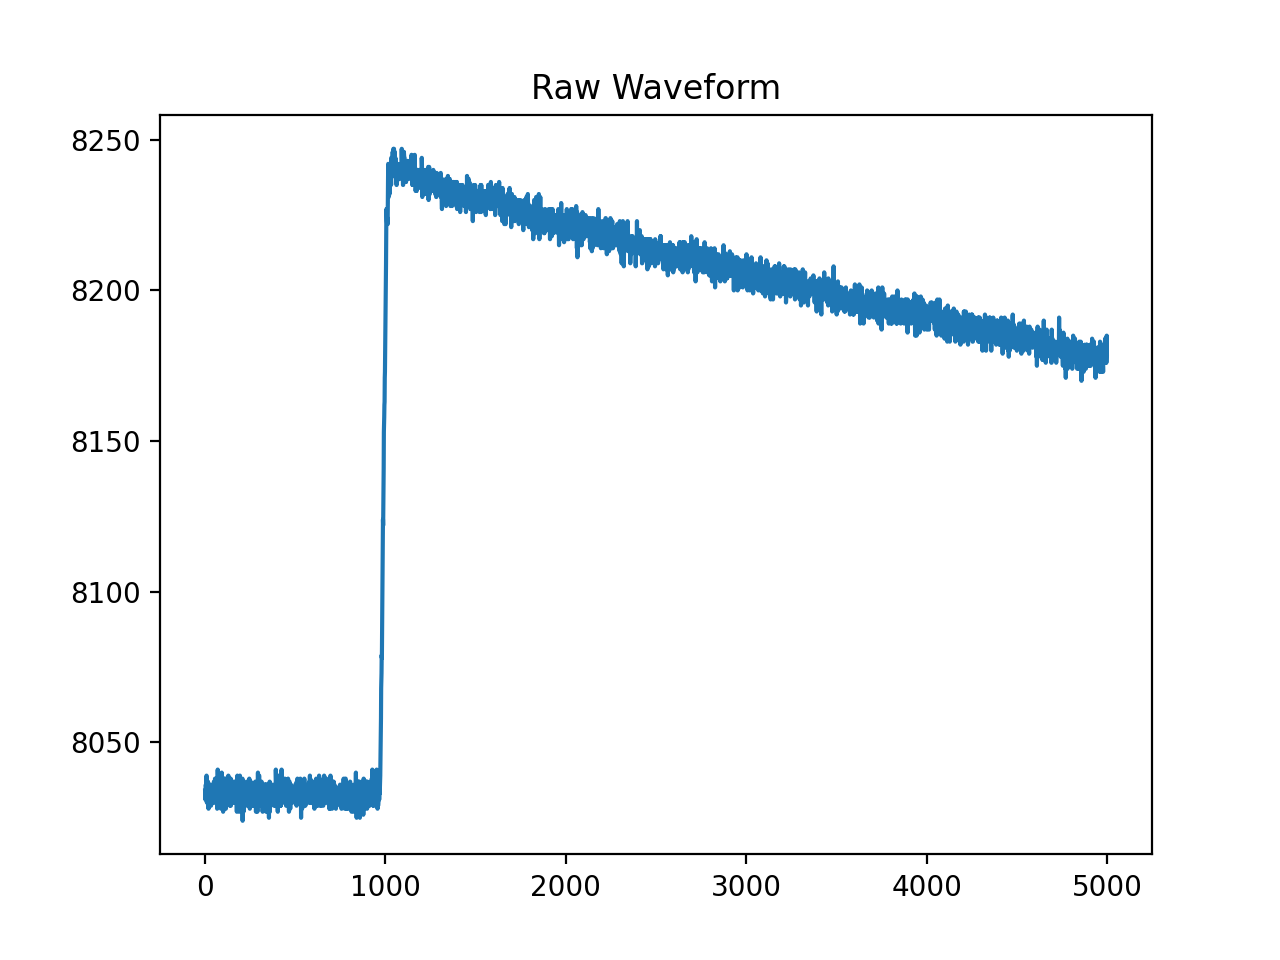

<IPython.core.display.Javascript object>


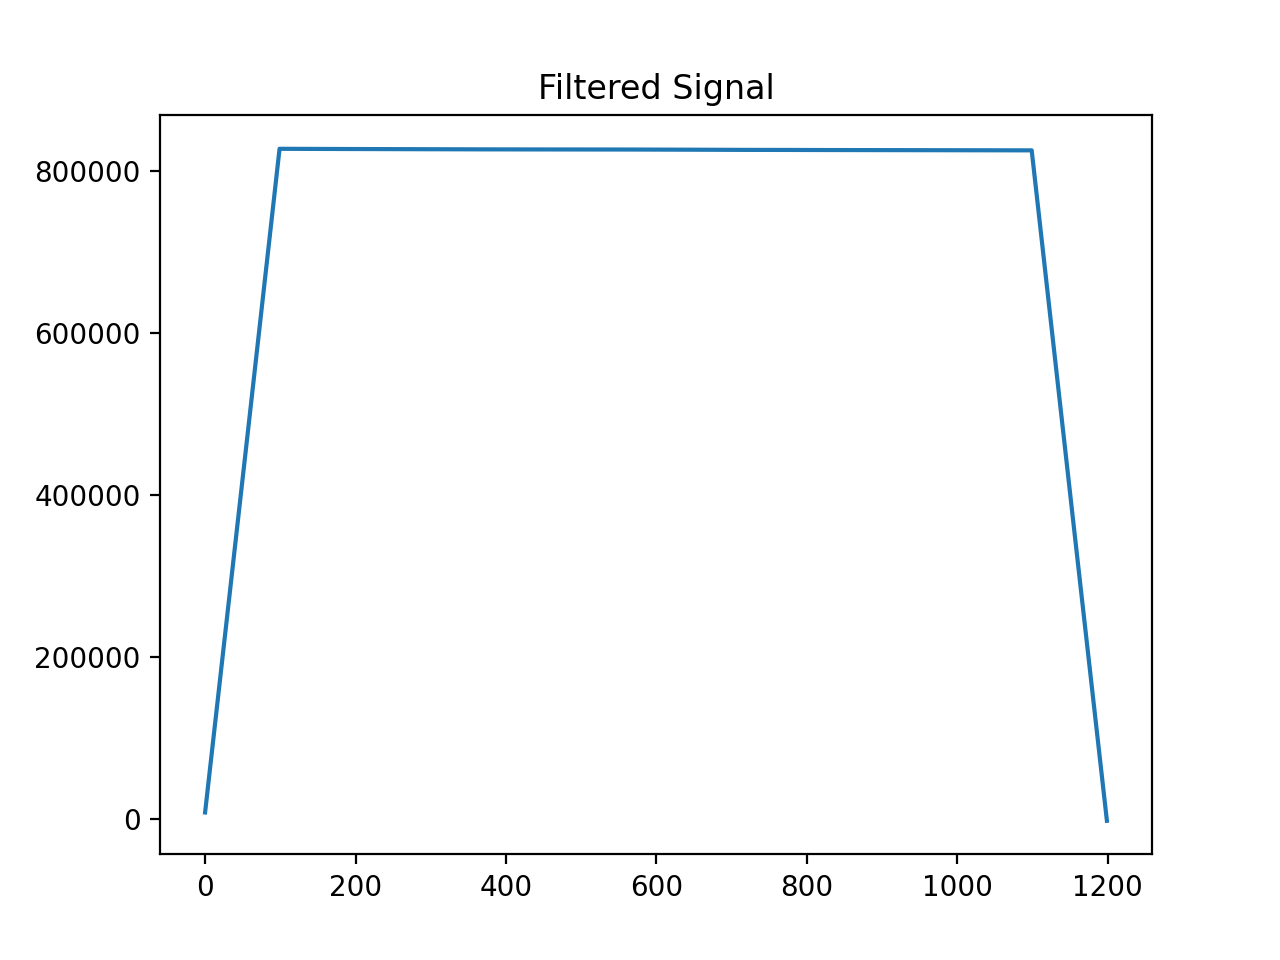

In [21]:
plt.figure()
plt.plot(calibration_cleaned[0])
plt.title("Raw Waveform")
plt.show()


integral, filtered_signal = shape_waveform(calibration_cleaned[0], trap_filter, k, pre_trigger_delay)

plt.figure()
plt.plot(filtered_signal)
plt.title("Filtered Signal")
plt.show()

<IPython.core.display.Javascript object>


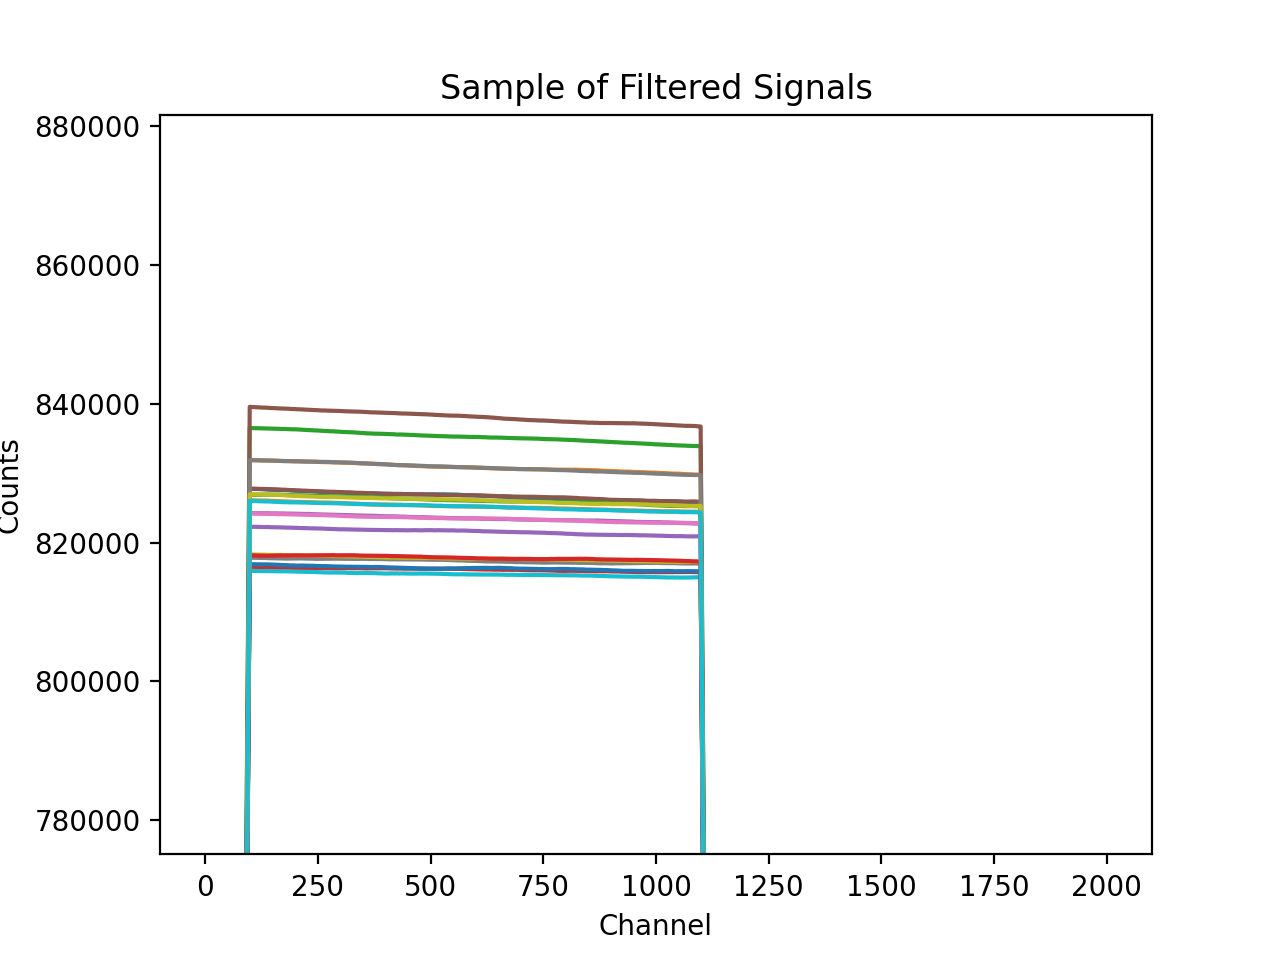

In [23]:

num_pulses = len(calibration_cleaned)
trapezoid_heights = np.zeros(num_pulses)

plt.figure()
for i in range( num_pulses ):
    trapezoid_heights[i], signal = shape_waveform(calibration_cleaned[i], trap_filter, k, pre_trigger_delay)
    if i < 20:
        plt.plot(signal)

plt.title("Sample of Filtered Signals")
plt.ylim((0.95*min(trapezoid_heights[:20]), 1.05*max(trapezoid_heights[:20])))
plt.show()

# plot spectrum

<IPython.core.display.Javascript object>


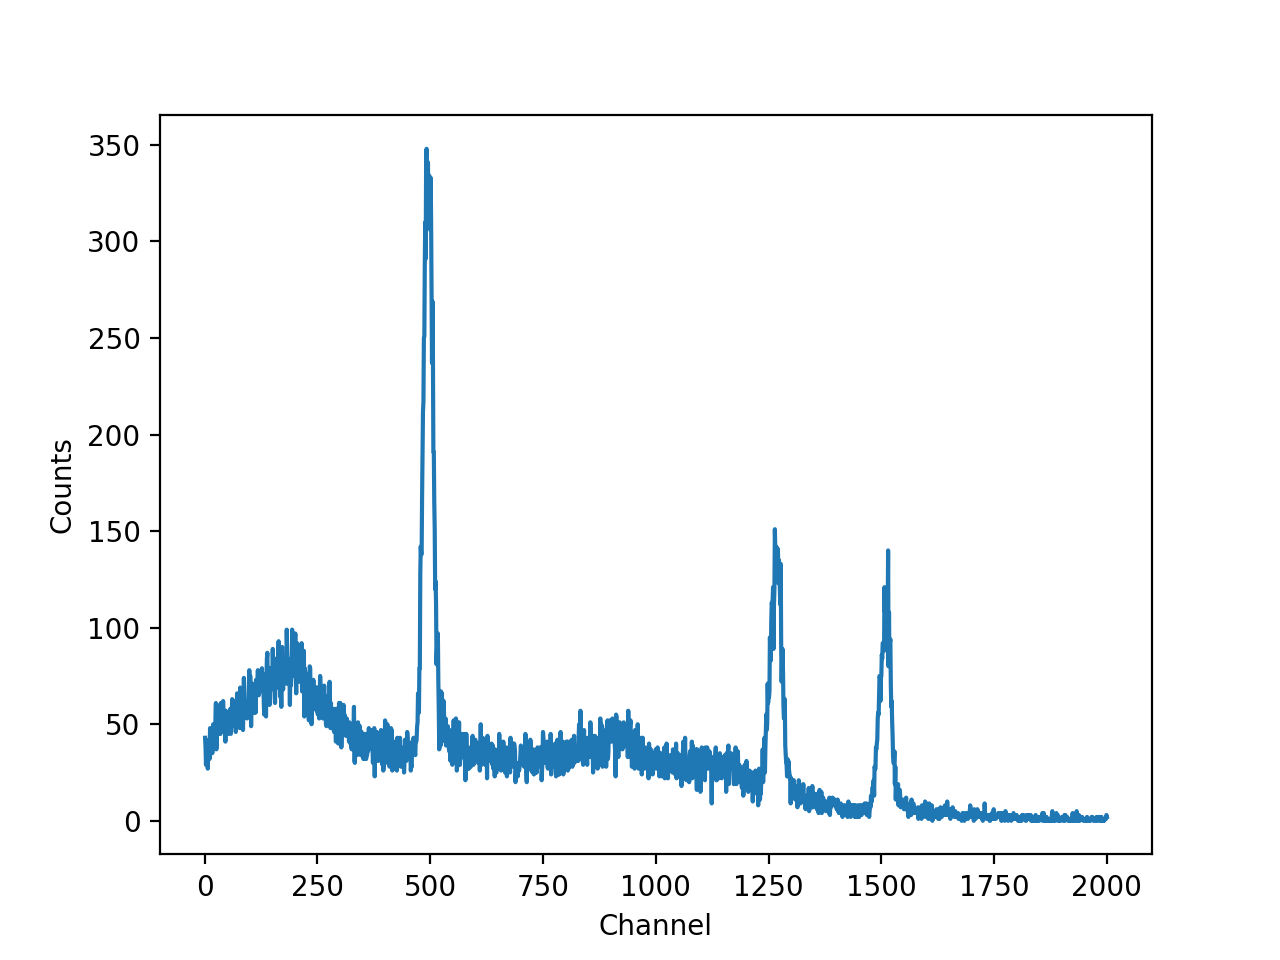

In [25]:

# Discard 0 valued pulses (waveform was anomalous)
spectrum_start = np.quantile(trapezoid_heights, 0.02)
# Ignore high outliers above 99.9th percentile (mostly noise)
spectrum_end = np.quantile(trapezoid_heights, 0.995)

number_of_bins = 2000

counts, bins = np.histogram(trapezoid_heights,
                            bins=number_of_bins, 
                            range=[spectrum_start, spectrum_end])
channels = np.arange(1, 1+len(counts))
plt.figure()
plt.plot(channels, counts)
plt.xlabel("Channel")
plt.ylabel("Counts")
plt.show()

In [26]:
binned_spectrum = Spectrum(counts)
source_energies = [661.7, 1173.228, 1332.492]
binned_spectrum.calibrate( source_energies, auto_calibrate=False , reset_calibration = True )

Opening plot for manual calibration...
What channel do you think the 661.7 keV gamma is in? 500
What channel do you think the 1173.228 keV gamma is in? 1251
What channel do you think the 1332.492 keV gamma is in? 1501
Energy(c) = -0.0004c^2 + 1.4481c + 9.9641


array([-3.88800346e-04,  1.44809481e+00,  9.96406911e+00])

In [27]:
binned_spectrum.show_histogram("Calibrated Spectrum")

# resolution vs energy

# efficiency calibration